https://storage.googleapis.com/kaggle-data-sets/17810/23812/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1570003842&Signature=kv64NSa1PzB4wrbvOpAR7jLEBrC4wtYe%2BQih6jaTR%2FrqNPGINSzSi5NoUyfzw9REdUKFfvQ%2B%2B6X5lwW5%2FuG0wkuL11TH4%2BkQ0Ac72BN9RvAEpE2uCfwJgEcjEOCT%2Bgq8f%2BouGH%2BL41Qij%2BI%2B29y7Udtd7eLP9eiqFlMEQAOOmTBQrSmHchTNlg7PKgifnsdx7E1Jb2gYn%2Ff82Gm1Vty31oXvysxZ4FUuFbS4EI7Oa0kJScdZEz6IZKl4HDPrOcV4bhrHo6ulZA0gUqoT3uysBjCi5%2FE2fyGRYGdhOEvGFbyx8PwLx%2FRyNOasjPYVJGp5q7xI5BtRAJCOp1m51jgdyA%3D%3D&response-content-disposition=attachment%3B+filename%3Dchest-xray-pneumonia.zip

Context

http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5



Figure S6. Illustrative Examples of Chest X-Rays in Patients with Pneumonia, Related to Figure 6 The normal chest X-ray (left panel) depicts clear lungs without any areas of abnormal opacification in the image. Bacterial pneumonia (middle) typically exhibits a focal lobar consolidation, in this case in the right upper lobe (white arrows), whereas viral pneumonia (right) manifests with a more diffuse ‘‘interstitial’’ pattern in both lungs. http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

Content

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

Acknowledgements

Data: https://data.mendeley.com/datasets/rscbjbr9sj/2

License: CC BY 4.0

Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
bs = 64

In [7]:
! curl "https://storage.googleapis.com/kaggle-data-sets/17810/23812/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1570003842&Signature=kv64NSa1PzB4wrbvOpAR7jLEBrC4wtYe%2BQih6jaTR%2FrqNPGINSzSi5NoUyfzw9REdUKFfvQ%2B%2B6X5lwW5%2FuG0wkuL11TH4%2BkQ0Ac72BN9RvAEpE2uCfwJgEcjEOCT%2Bgq8f%2BouGH%2BL41Qij%2BI%2B29y7Udtd7eLP9eiqFlMEQAOOmTBQrSmHchTNlg7PKgifnsdx7E1Jb2gYn%2Ff82Gm1Vty31oXvysxZ4FUuFbS4EI7Oa0kJScdZEz6IZKl4HDPrOcV4bhrHo6ulZA0gUqoT3uysBjCi5%2FE2fyGRYGdhOEvGFbyx8PwLx%2FRyNOasjPYVJGp5q7xI5BtRAJCOp1m51jgdyA%3D%3D&response-content-disposition=attachment%3B+filename%3Dchest-xray-pneumonia.zip" > data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2349M  100 2349M    0     0   375M      0  0:00:06  0:00:06 --:--:--  389M


In [9]:
! unzip data.zip

Archive:  data.zip
  inflating: chest_xray/__MACOSX/._chest_xray  
  inflating: chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/._test  
  inflating: chest_xray/__MACOSX/chest_xray/._train  
  inflating: chest_xray/__MACOSX/chest_xray/test/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/test/._NORMAL  
  inflating: chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0003-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0005-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0006-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0010-0001.jpeg  
  inflating: chest_xray/__MACOSX/che

In [14]:
! rm -rf chest_xray/__MACOSX

In [4]:
! rm -rf chest_xray/chest_xray

In [7]:
! ls chest_xray

test  train  val


In [17]:
path_train = "chest_xray/train"

In [10]:
path_test = "chest_xray/test"

In [35]:
train_files = get_image_files(path_train, True, True)

In [36]:
test_files = get_image_files(path_test, True, True)

In [40]:
train_files[:5], train_files[-5:]

([PosixPath('chest_xray/train/NORMAL/NORMAL2-IM-0386-0001.jpeg'),
  PosixPath('chest_xray/train/NORMAL/IM-0650-0001.jpeg'),
  PosixPath('chest_xray/train/NORMAL/NORMAL2-IM-0934-0001.jpeg'),
  PosixPath('chest_xray/train/NORMAL/IM-0195-0001.jpeg'),
  PosixPath('chest_xray/train/NORMAL/NORMAL2-IM-1020-0001-0002.jpeg')],
 [PosixPath('chest_xray/train/PNEUMONIA/person124_virus_231.jpeg'),
  PosixPath('chest_xray/train/PNEUMONIA/person598_bacteria_2453.jpeg'),
  PosixPath('chest_xray/train/PNEUMONIA/person258_bacteria_1205.jpeg'),
  PosixPath('chest_xray/train/PNEUMONIA/person309_virus_631.jpeg'),
  PosixPath('chest_xray/train/PNEUMONIA/person1442_bacteria_3726.jpeg')])

In [41]:
test_files[:5], test_files[-5:]

([PosixPath('chest_xray/test/NORMAL/NORMAL2-IM-0201-0001.jpeg'),
  PosixPath('chest_xray/test/NORMAL/NORMAL2-IM-0238-0001.jpeg'),
  PosixPath('chest_xray/test/NORMAL/IM-0031-0001.jpeg'),
  PosixPath('chest_xray/test/NORMAL/NORMAL2-IM-0233-0001.jpeg'),
  PosixPath('chest_xray/test/NORMAL/IM-0109-0001.jpeg')],
 [PosixPath('chest_xray/test/PNEUMONIA/person80_bacteria_391.jpeg'),
  PosixPath('chest_xray/test/PNEUMONIA/person173_bacteria_830.jpeg'),
  PosixPath('chest_xray/test/PNEUMONIA/person101_bacteria_486.jpeg'),
  PosixPath('chest_xray/test/PNEUMONIA/person1608_virus_2786.jpeg'),
  PosixPath('chest_xray/test/PNEUMONIA/person78_bacteria_386.jpeg')])

In [42]:
pat = r'/([^/]+)/[^/]+.\w$'

In [44]:
doc(ImageDataBunch.from_name_re)

from_name_re [source] [test] from_name_re ( path : PathOrStr , fnames : FilePathList , pat : str , valid_pct : float = 0.2 , ** kwargs ) 
 
 × Tests found for from_name_re : pytest -sv tests/test_vision_data.py::test_from_name_re [source] pytest -sv tests/test_vision_data.py::test_image_resize [source] To run tests please refer to this guide . Create from list of fnames in path with re expression pat . 
 Show in docs

In [45]:
! ls chest_xray

test  train  val


In [49]:
data = ImageDataBunch.from_folder("chest_xray", "train", "val", test="test", bs=bs,size=224,ds_tfms=get_transforms()).normalize(imagenet_stats)

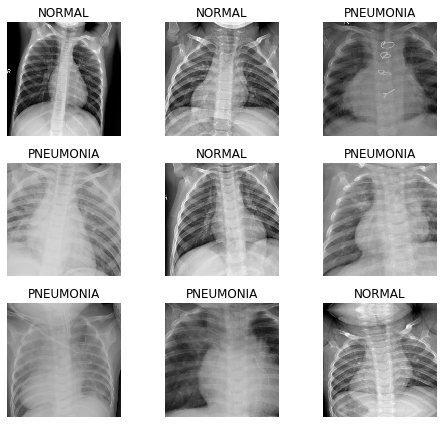

In [50]:
data.show_batch(rows=3, figsize=(7,6))

In [51]:
print(data.classes)
len(data.classes),data.c

['NORMAL', 'PNEUMONIA']


(2, 2)

In [52]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [53]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.457407,0.826465,0.187500,01:11
1,0.276848,0.598907,0.312500,01:10
2,0.181811,0.277321,0.062500,01:09
3,0.160982,0.216339,0.062500,01:10


In [54]:
learn.save("4-iters")

In [55]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.148931,0.745838,0.375000,01:10
1,0.141746,0.305205,0.187500,01:10


In [62]:
learn.load("4-iters")

Learner(data=ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: chest_xray;

Valid: LabelList (16 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: chest_xray;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: chest_xray, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlo

In [57]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [63]:
learn.unfreeze()

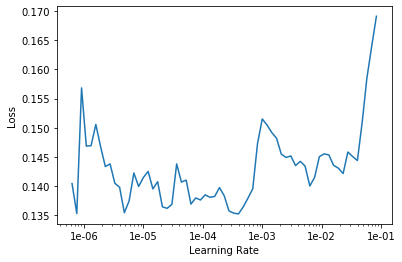

In [60]:
learn.recorder.plot()

In [64]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.142999,0.239643,0.062500,01:10
1,0.127298,0.119791,0.062500,01:12


In [65]:
interp = ClassificationInterpretation.from_learner(learn)

In [66]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

In [70]:
learn.save("trained-4-2")

In [73]:
test_data = ImageList.from_folder("chest_xray").split_by_folder(train='train', valid='test').label_from_folder().transform([]).databunch().normalize()

You can deactivate this warning by passing `no_check=True`.


/opt/anaconda3/lib/python3.7/site-packages/fastai/basic_data.py:269: UserWarning: It's not possible to collate samples of your dataset together in a batch.
Shapes of the inputs/targets:
[[torch.Size([3, 979, 1410]), torch.Size([3, 1827, 2134]), torch.Size([3, 1094, 1488]), torch.Size([3, 1195, 1500]), torch.Size([3, 1774, 1874]), torch.Size([3, 808, 1008]), torch.Size([3, 1356, 1924]), torch.Size([3, 1148, 1310]), torch.Size([3, 1499, 1800]), torch.Size([3, 1176, 1536]), torch.Size([3, 1758, 1804]), torch.Size([3, 632, 1072]), torch.Size([3, 936, 1488]), torch.Size([3, 1073, 1453]), torch.Size([3, 543, 854]), torch.Size([3, 976, 1440]), torch.Size([3, 632, 1104]), torch.Size([3, 1056, 1392]), torch.Size([3, 688, 1024]), torch.Size([3, 1615, 1890]), torch.Size([3, 1352, 1592]), torch.Size([3, 1942, 2185]), torch.Size([3, 712, 1304]), torch.Size([3, 560, 872]), torch.Size([3, 1560, 1568]), torch.Size([3, 1464, 1690]), torch.Size([3, 1248, 1264]), torch.Size([3, 488, 760]), torch.Size([3,

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "/opt/anaconda3/lib/python3.7/site-packages/fastai/torch_core.py", line 127, in data_collate
    return torch.utils.data.dataloader.default_collate(to_data(batch))
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 80, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 80, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 56, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 976 and 792 in dimension 2 at /opt/conda/conda-bld/pytorch_1565272271120/work/aten/src/TH/generic/THTensor.cpp:689


In [74]:
test_data = ImageDataBunch.from_folder("chest_xray", "train", "test", bs=bs,size=224,ds_tfms=[]).normalize(imagenet_stats)

In [75]:
learn.validate(test_data.valid_dl)

[0.31324726, tensor(0.1154)]

In [78]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path: Union[pathlib.Path, str], train: Union[pathlib.Path, str] = 'train', valid: Union[pathlib.Path, str] = 'valid', valid_pct=None, seed: int = None, classes: Collection = None, **kwargs: Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



In [9]:

data2 = ImageDataBunch.from_folder("chest_xray", "train", None, 0.2, bs=bs,size=224,ds_tfms=get_transforms(),seed=42).normalize(imagenet_stats)

In [10]:
learn2 = cnn_learner(data2, models.resnet34, metrics=error_rate)

In [11]:
learn2.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.517825,0.336820,0.096499,01:18
1,0.310224,0.257756,0.089667,01:20
2,0.225768,0.181883,0.061486,01:20
3,0.195267,0.198587,0.064902,01:17


In [12]:
learn2.save("4-iters2")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


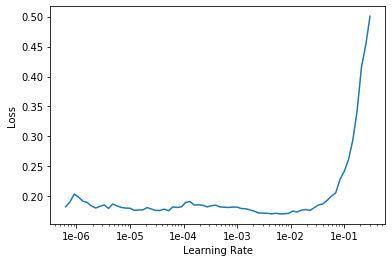

In [13]:
learn2.lr_find()
learn2.recorder.plot()

In [7]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path: Union[pathlib.Path, str], train: Union[pathlib.Path, str] = 'train', valid: Union[pathlib.Path, str] = 'valid', valid_pct=None, seed: int = None, classes: Collection = None, **kwargs: Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



In [14]:
learn2.unfreeze()

In [15]:
learn2.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.183663,0.314257,0.073442,01:20
1,0.121228,0.089286,0.029889,01:20


In [16]:
learn2.save("4-iters2-2")

In [17]:
learn2.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.130432,0.136606,0.046114,01:21


In [18]:
learn2.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.115880,0.264439,0.063194,01:21
1,0.110202,0.093456,0.030743,01:21


In [20]:
test_data = ImageDataBunch.from_folder("chest_xray", "train", "test", bs=bs,size=224,ds_tfms=[],seed=42).normalize(imagenet_stats)

In [22]:
learn2.validate(data2.valid_dl)

[0.093455926, tensor(0.0307)]

In [23]:
learn2.validate(data2.valid.dl, )

Help on method validate in module fastai.basic_train:

validate(dl=None, callbacks=None, metrics=None) method of fastai.basic_train.Learner instance
    Validate on `dl` with potential `callbacks` and `metrics`.

